In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

In [ ]:
class CustomKMeans:
    cluster_centers = np.array([])

    def __init__(self, n_clusters, tol=1e-4):
        self.n_clusters = n_clusters

    @staticmethod
    def initialize_centers_plus_plus(X, k):
        # Initializes the first cluster to the first center
        centers = [X[0]]

        # Initililizes the remaining clusters based off prob. distributions
        for _ in range(1, k):
            # Gets an array of the min inner product among the vector between every center and every point
            inners = np.array([min([np.inner(center-x, center-x) for center in centers]) for x in X])
            # Converts this to an array of probabilities and gets the cummuluative sum
            probs = inners/inners.sum()
            cumprobs = probs.cumsum()
            r = np.random.rand()

            # Once a cummuluative prob is reached that is greater than a random
            # Seed, then add that point to the center
            for j, p in enumerate(cumprobs):
                if r < p:
                    i = j
                    break
            centers.append(X[i])

        return np.array(centers)

    def fit(self, X, num_iter, init='plus_plus'):
        # asserts that data is passed in as an array of vectors
        assert len(X.shape) <= 2
        num_data = X.shape[0]
        dim = X.shape[1]
        data_range = X.max(axis=0) - X.min(axis=0)

        # Initializes cluster centers to random points in X
        if init == "random":
            clusters = []
            for _ in range(self.n_clusters):
                i = np.random.randint(0, num_data)
                clusters.append(X[i])
            clusters = np.array(clusters)

        # Initializes cluster centers using probability distribution
        elif init == "plus_plus":
            clusters = self.initialize_centers_plus_plus(X, self.n_clusters)

        # Runs KMeans for specified iterations
        for _ in range(num_iter):
            # Creates voronoi cells for each cluster
            cells = [[] for _ in range(len(clusters))]
            # Adds each point to the voronoi cell of its closest cluster
            for point in X:
                norms = np.linalg.norm(clusters - point, axis=1)
                cells[np.argmin(norms)].append(point)
            # Calculates new cluster centers
            next_clusters = []
            for cell in cells:
                # Sets new cluster to mean of its cell
                cell = np.array(cell)
                if len(cell) != 0:
                    next_clusters.append(np.mean(cell, axis=0))
                # If cell is empty, re initializes cluster to random point
                else:
                    i = np.random.randint(0, num_data)
                    next_clusters.append(X[i])

            clusters = np.array(next_clusters)

        self.cluster_centers = clusters

    # Takes in a vector x and returns the index of the cluster center
    # who's cells it belongs to
    def predict(self, x):
        norms = np.norm(self.cluster_centers - x, axis=1)
        return np.argmin(norms)


# KMeans

## Overview
> KMeans requires 4 parameters for its use on data. When initializing the class it takes in the number of cluster centers that it will use. When fitting the data using km.fit, the user must pass in the data in the form of an array of vectors. They also indicate the number of iterations for the main algorithm and the type of initialization they wish to use for cluster centers.

## Using KMeans with Obvious Clusters
> KMeans is very useful at finding the center of clusters if it is already clear that there are distinct clusters in the data. This is because KMeans requires the user to input the number of clusters to calculate in the data. Below are examples of KMeans finding the cluster centers of clear data clusters.

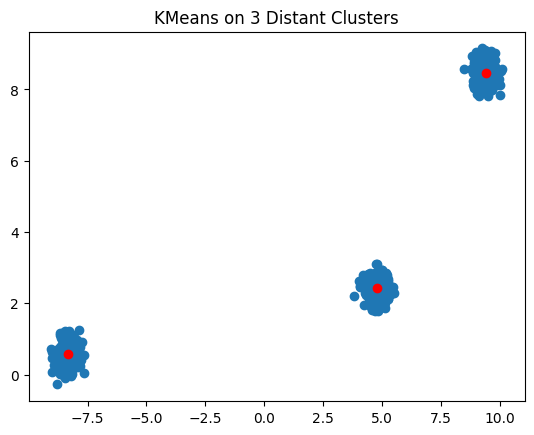

In [ ]:
# %%timeit
x_blob, y_blob = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std=0.25)
custom_km = CustomKMeans(3)
initial = custom_km.fit(x_blob, 100, init="plus_plus")
plt.scatter(*x_blob.T)
plt.scatter(*custom_km.cluster_centers.T, color="red")
plt.title("KMeans on 3 Distant Clusters")
plt.show()

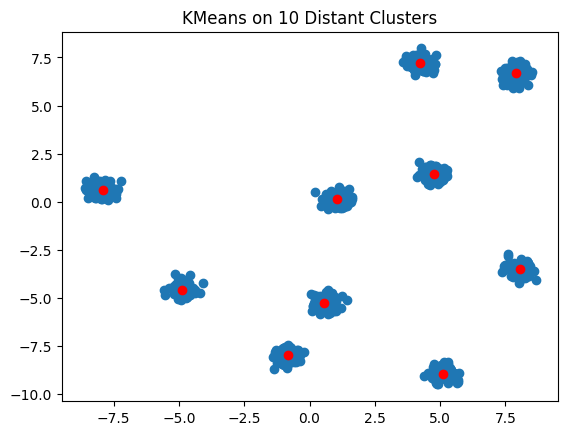

In [ ]:
# %%timeit
x_blob, y_blob = make_blobs(n_samples=1000, n_features=2, centers=10, cluster_std=0.25)
custom_km = CustomKMeans(10)
initial = custom_km.fit(x_blob, 100, init="plus_plus")
plt.scatter(*x_blob.T)
plt.scatter(*custom_km.cluster_centers.T, color="red")
plt.title("KMeans on 10 Distant Clusters")
plt.show()

## Using KMeans on Close Clusters
> One issue that can arise with KMeans is fitting data where clusters aren't always clear. If one undershoots or overshoots the number of cluster centers when initializing KMeans, it can lead to results that don't best describe the data. Therefore, in practice, data scientists should test different cluster numbers and see how each version describes the data.

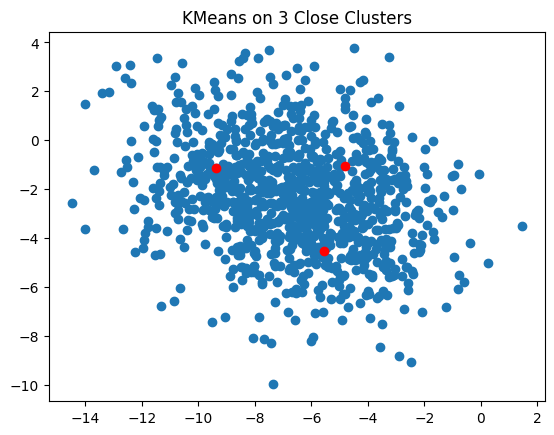

In [ ]:
x_blob, y_blob = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std=2)
custom_km = CustomKMeans(3)
initial = custom_km.fit(x_blob, 100, init="plus_plus")
plt.scatter(*x_blob.T)
plt.scatter(*custom_km.cluster_centers.T, color="red")
plt.title("KMeans on 3 Close Clusters")
plt.show()

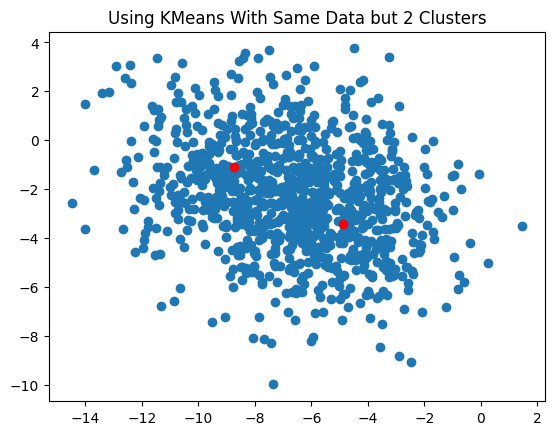

In [ ]:
custom_km = CustomKMeans(2)
initial = custom_km.fit(x_blob, 100, init="plus_plus")
plt.scatter(*x_blob.T)
plt.scatter(*custom_km.cluster_centers.T, color="red")
plt.title("Using KMeans With Same Data but 2 Clusters")
plt.show()

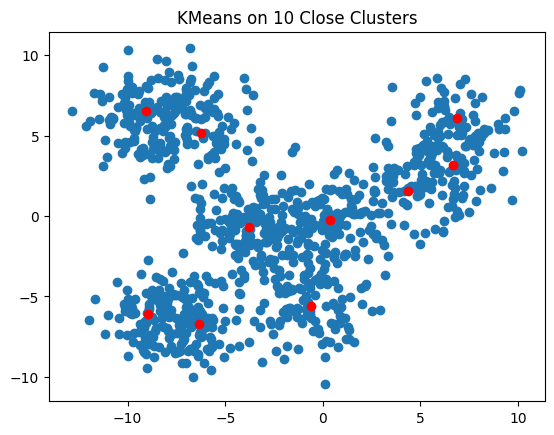

In [ ]:
x_blob, y_blob = make_blobs(n_samples=1000, n_features=2, centers=10, cluster_std=1.5)
custom_km = CustomKMeans(10)
initial = custom_km.fit(x_blob, 100, init="plus_plus")
plt.scatter(*x_blob.T)
plt.scatter(*custom_km.cluster_centers.T, color="red")
plt.title("KMeans on 10 Close Clusters")
plt.show()

## Timing KMeans on a Large Dataset
> We will now test the efficiency of KMeans on a dataset of 100,000 2D vectors. We will use %%timeit to run multiple experiments of KMeans to calculate the average time taken to train on 100,000 vectors. The settings used for KMeans will be 10 clusters and 100 iterations.

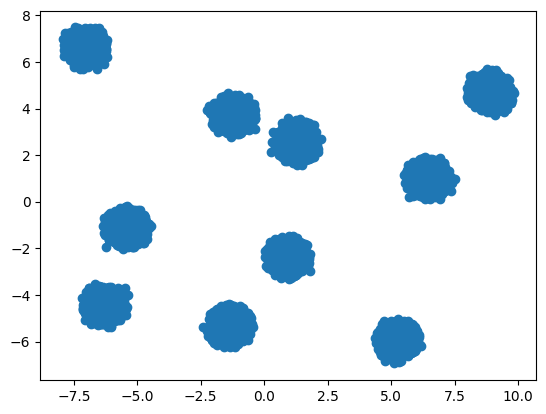

In [ ]:
x_blob, y_blob = make_blobs(n_samples=100_000, n_features=2, centers=10, cluster_std=0.25)
plt.scatter(*x_blob.T)

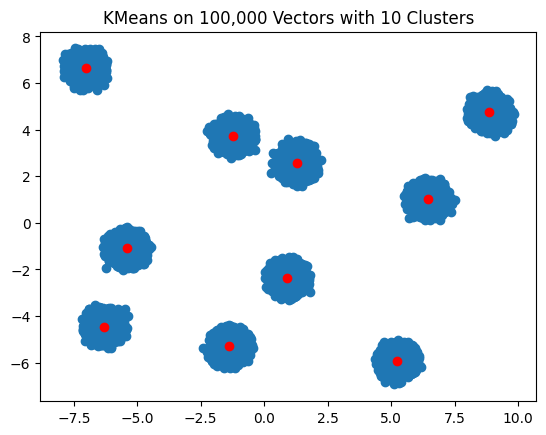

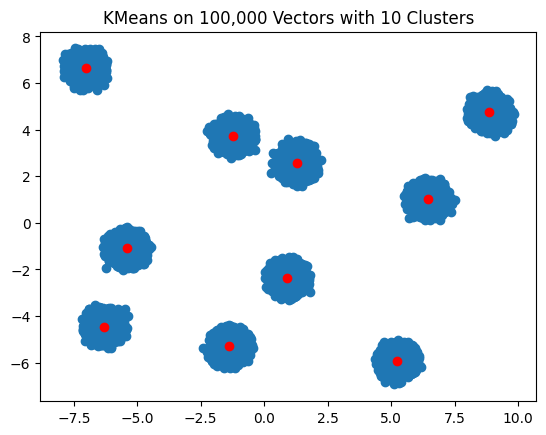

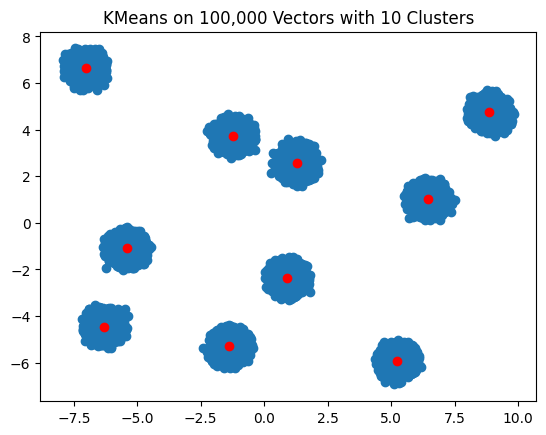

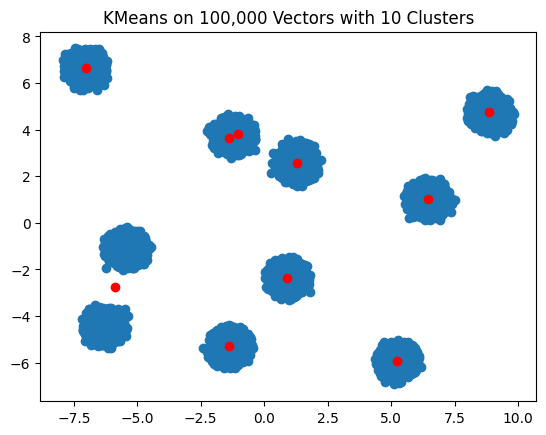

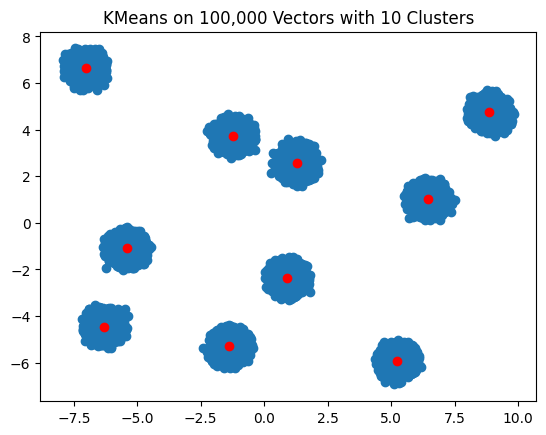

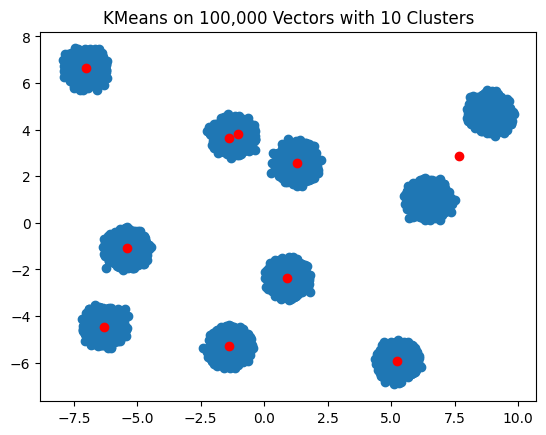

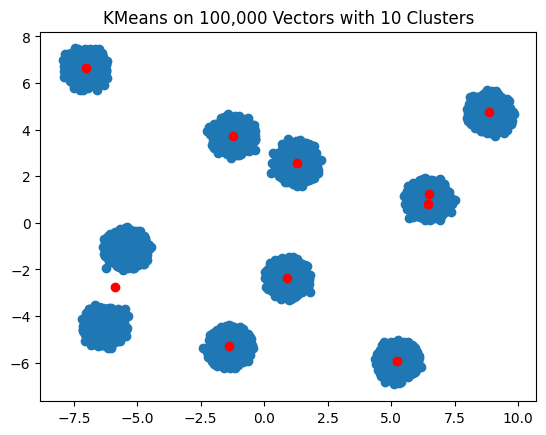

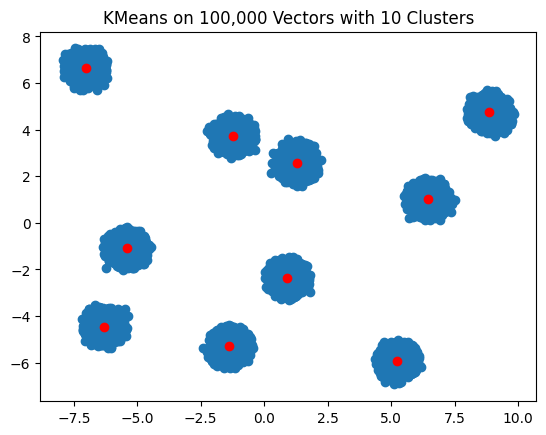

2min 46s ± 1.46 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
custom_km = CustomKMeans(10)
initial = custom_km.fit(x_blob, 100, init="plus_plus")
plt.scatter(*x_blob.T)
plt.scatter(*custom_km.cluster_centers.T, color="red")
plt.title("KMeans on 100,000 Vectors with 10 Clusters")
plt.show()

## Real World Application of KMeans
> Instead of using random blobs as our data points, we will show a real world use of KMeans using the MNIST dataset. MNIST is a dataset of 60,000 handwritten images of digits from 0-9. In theory, there should be 10 distinct groups of images, so we will train KMeans using 10 clusters on the image vectors and analyze the result.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Some Examples from the Dataset
> To get an idea of the data we will be working with, below is a quick visualization of a few of the images from the MINST datset. Each image is 28x28 pixels and can be represented as a single vector dimension 784 for KMeans training.

In [ ]:
def plot_images_in_a_row(ims):
    fig, axs = plt.subplots(1, len(ims), figsize=(15, 5))
    for i, im in enumerate(ims):
        axs[i].imshow(im, cmap="gray")
        axs[i].axis("off")
    plt.show()

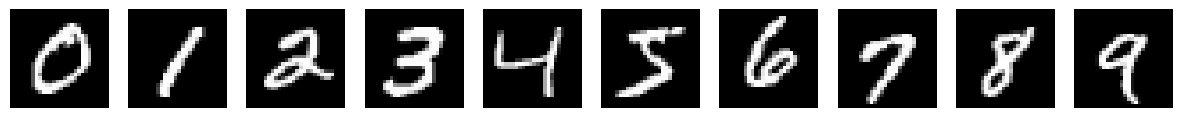

In [ ]:
ims = []
for num in range(10):
    i = np.where(y_train == num)[0][0]
    ims.append(x_train[i])
plot_images_in_a_row(ims)

### Training KMeans
> We will now train KMeans on this dataset, by reshaping each image into a vector of dimension 28*28 = 784. The first visualiztion we will do is showing the image formed by each cluster center. Since these clusters are just vectors in $\mathbb{R}^{784}$, we can reshape them into 28 x 28 images and display them. These will give us unique images that are not a part of the dataset and are instead the "mean" image of the clusters that they represent. In theory, this should give us a good visualization of the average image inside each cluster.

In [ ]:
custom_km_mnist = CustomKMeans(10)
custom_km_mnist.fit(x_train.reshape(-1, 28*28), 10)

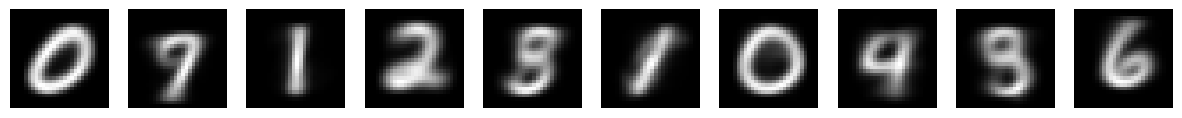

In [ ]:
plot_images_in_a_row(custom_km_mnist.cluster_centers.reshape(-1, 28, 28))

> Notice that these images are "blurry" as they are found by averaging together every image in the cluster. It also shows that KMeans wasn't perfectly able to divide the dataset into each of the 10 digits, as there a few repeat digits, which can indicate cluster centers converging to the same cluster. This can happend as KMeans will always find local minimum in the loss function, but is not always guranteed to find the absolute global minimum, that is the best possible cluster centers.

> To get a better understanding of the digits that lie in each cluster, we will now display the 10 closest images to each cluster center. By "closest" we mean in terms of the Euclidian Distance between the cluster vectors and remaining image vectors. For each plot, the first image is the cluster, and the following 10 images will be the closest to that cluster center in terms of Euclidian Distance. To quickly calculate the 10 nearest neighbors, we will use the NearestNeighbors from scikit learn, which allows us to efficiently calculate the 10 nearest neighbors to each cluster using Euclidian Distance.

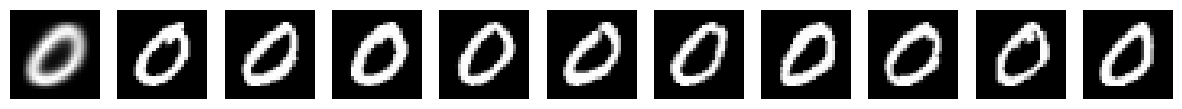

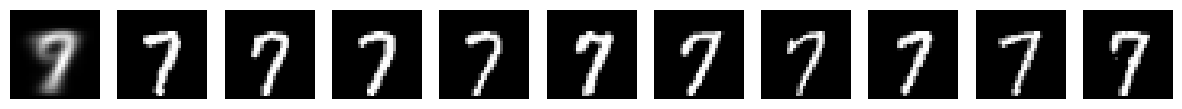

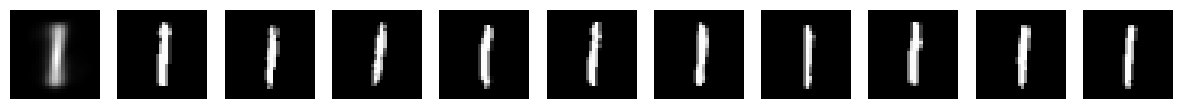

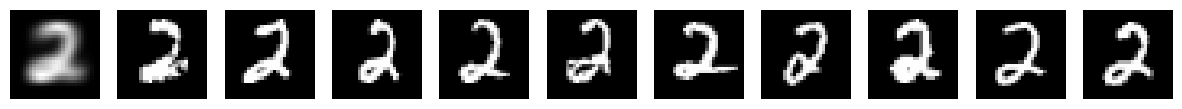

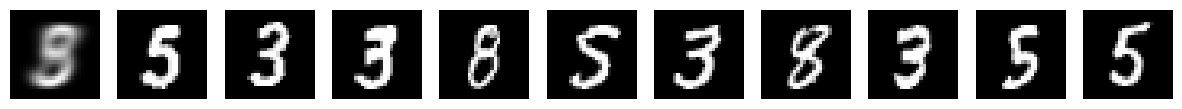

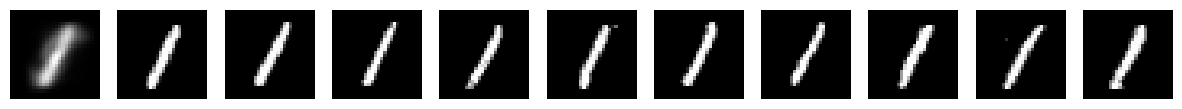

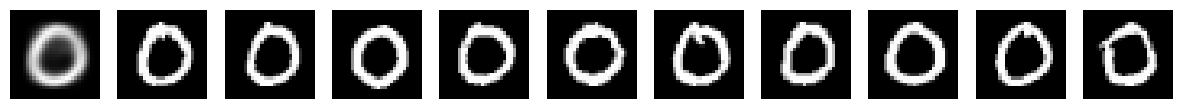

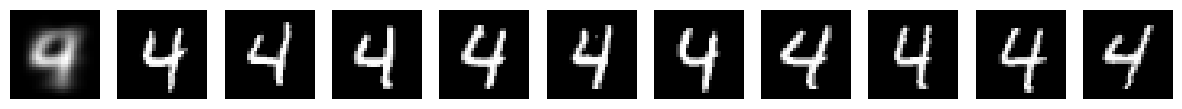

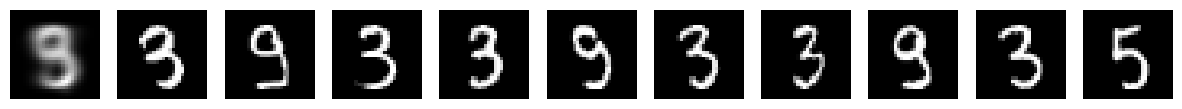

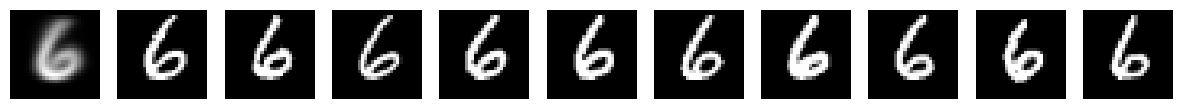

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=10)
knn.fit(x_train.reshape(-1, 28*28))


for center in custom_km_mnist.cluster_centers:
    inds = knn.kneighbors(center.reshape(1, -1), return_distance=False)[0]
    ims = np.concatenate((center.reshape(1, 28, 28), x_train[inds]))
    plot_images_in_a_row(ims)


In [ ]:
class CustomDBscan:
    def __init__(self, minPts, epsilon):
        self.minPts = minPts
        self.epsilon = epsilon
        self.labels = []

    # Finds the nearest neighbors
    def findNeighbors(self, x, point, epsilon):
      norms = np.linalg.norm(x - point, axis=1)
      inds = norms <= epsilon
      return inds.nonzero()[0]

    def getCluster(self, x, neighbors, visited, labels, cluster):
      for neighbor in neighbors:
        if (visited[neighbor] == 0):
          # set point as visited and add to cluster
          visited[neighbor] = 1
          cluster.append(neighbor)

    def fit(self, x):
      num_clusters = 0;
      visited = np.zeros(len(x))

      clusters = [[]]
      # initialize labels
      labels = np.zeros(len(x))
      for i in range(len(x)):
        if (labels[i] != 0):
          continue
        # core point is -1
        labels[i] = -1
        neighbors = self.findNeighbors(x, x[i], self.epsilon)
        # if not a core point, continue
        if (len(neighbors) < self.minPts):
          labels[i] = -2
          continue
        # if core point that hasn't been visited, create new cluster and visit all other core points
        if (visited[i] == 0):
          visited[i] = 1
          cluster = [i]
          self.getCluster(x[i], neighbors, visited, labels, cluster)
          num_clusters += 1
          clusters.append(cluster)

      next_labels = np.zeros(len(x))
      i = 0
      for cluster in clusters:
        if len(cluster) == 0:
          continue
        for index in cluster:
          next_labels[index] = i
        i += 1
      self.labels = next_labels

# Density Based Spacial Clustering of Applications with Noise (DBSCAN)

## Overview
> DBSCAN is another form of unsupervised clustering algorithm. Unlike KMeans, DBSCAN does not rely on a set number of centroids to determine clusters in the dataset. Instead, DBSCAN will automatically detect clusters based off of the density of data via Euclidian Distance. Therefore, the only parameters used in setting up the DBSCAN class are min_points and epsilon. In the DBSCAN algorithm, it will recursviely find all points that are within an *epsilon* distance of each other. If these sets of points contain more than *min_points* then it will be marked as a cluster. When fitting the data using the class, the user just passes in an array of vectors that is the dataset. What DBSCAN sets is a variable called labels. Labels is an array of integers such that labels[i] indicates that the vector in X[i] corresponds to cluster i. Therefore the number of unique integers in labels is the number of clusters that DBSCAN detects. In order to visualize these clusters, we generate *n* random colors, where *n* is the number of clusters detected and color each datapoint based on the cluster it is assigned to.

## DBSCAN on Distant Clusters
> Like how we did with KMeans, we will pass in examples of distant clusters and use DBSCAN to try and identify clusters themselves.

Text(0.5, 1.0, 'DBSCAN with 3 Distant Clusters')

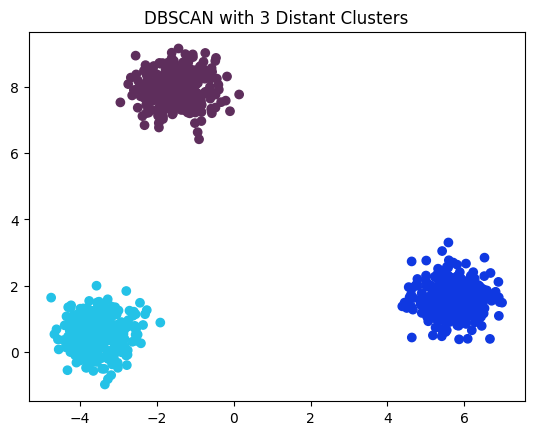

In [ ]:
x_blob, y_blob = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std=0.5)

db_scan = CustomDBscan(3, 3)
db_scan.fit(x_blob)
labels = db_scan.labels.astype(int)
num_clusters = len(np.unique(labels))
colors = np.random.random((num_clusters, 3))
label_colors = colors[labels]

plt.scatter(*x_blob.T, c=label_colors)
plt.title(f"DBSCAN with 3 Distant Clusters")

Text(0.5, 1.0, 'DBSCAN with 10 Distant Clusters')

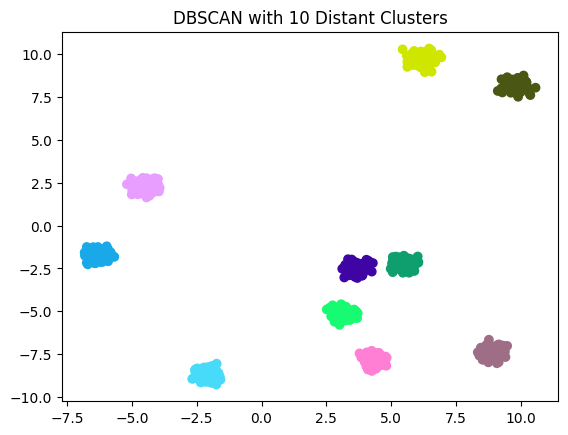

In [ ]:
x_blob, y_blob = make_blobs(n_samples=1000, n_features=2, centers=10, cluster_std=0.25)

db_scan = CustomDBscan(60, 1.5)
db_scan.fit(x_blob)
labels = db_scan.labels.astype(int)
num_clusters = len(np.unique(labels))
colors = np.random.random((num_clusters, 3))
label_colors = colors[labels]

plt.scatter(*x_blob.T, c=label_colors)
plt.title(f"DBSCAN with 10 Distant Clusters")

> Since DBSCAN is not being specifically told the number of clusters as it is done in KMeans, sometimes DBSCAN will overshoot the number of cluster centers due different values of min_points and epsilon given. That is why if the number of clusters are already known, KMeans will be the more useful tool for data insight, whereas DBSCAN is good at identifying possible clusters that may not be easily noticed.

## DBSCAN on Close Clusters

> We will now visualize using DBSCAN on close clusters, where the number of clusters are not as obvious. We will also change the *min_points* and *epsilon* parameters to show how that can change the results of DBSCAN.

Text(0.5, 1.0, 'DBSCAN with 3 Close Clusters. min_points: 10, epsilon: 10')

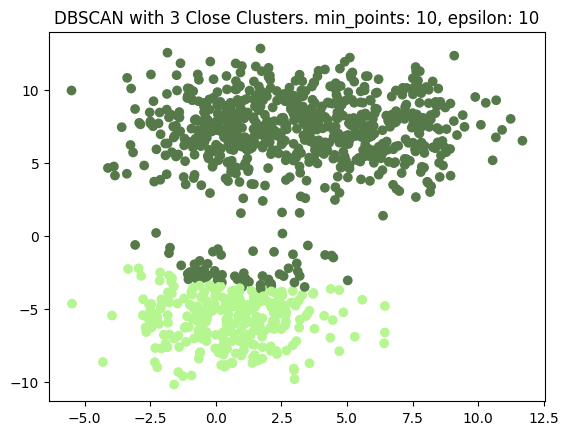

In [ ]:
x_blob, y_blob = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std=2)

db_scan = CustomDBscan(10, 10)
db_scan.fit(x_blob)
labels = db_scan.labels.astype(int)
num_clusters = len(np.unique(labels))
colors = np.random.random((num_clusters, 3))
label_colors = colors[labels]

plt.scatter(*x_blob.T, c=label_colors)
plt.title(f"DBSCAN with 3 Close Clusters. min_points: 10, epsilon: 10")

Text(0.5, 1.0, 'DBSCAN with 3 Close Clusters. min_points: 10, epsilon: 7')

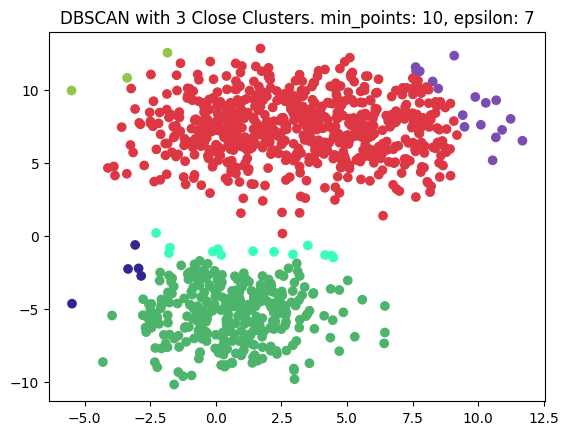

In [ ]:
db_scan = CustomDBscan(10, 7)
db_scan.fit(x_blob)
labels = db_scan.labels.astype(int)
num_clusters = len(np.unique(labels))
colors = np.random.random((num_clusters, 3))
label_colors = colors[labels]

plt.scatter(*x_blob.T, c=label_colors)
plt.title(f"DBSCAN with 3 Close Clusters. min_points: 10, epsilon: 7")

Text(0.5, 1.0, 'DBSCAN with 3 Close Clusters. min_points: 10, epsilon: 3')

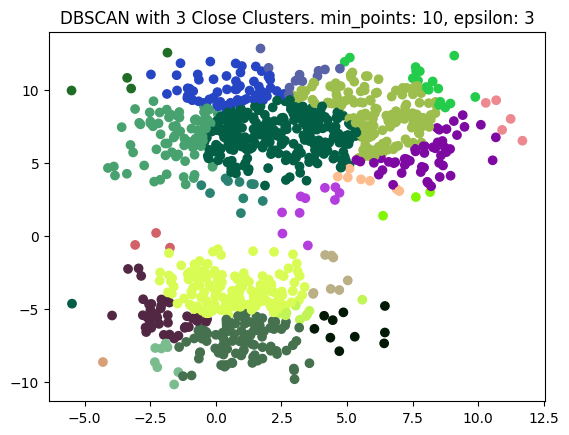

In [ ]:
db_scan = CustomDBscan(10, 3)
db_scan.fit(x_blob)
labels = db_scan.labels.astype(int)
num_clusters = len(np.unique(labels))
colors = np.random.random((num_clusters, 3))
label_colors = colors[labels]

plt.scatter(*x_blob.T, c=label_colors)
plt.title(f"DBSCAN with 3 Close Clusters. min_points: 10, epsilon: 3")

> Notice how epsilon controls how "tight" the bounds are for the DBSCAN clusters. Therefore, by lowering the value of epsilon, it will decrease the number of points that are in clusters, resulting in DBSCAN picking up a larger number of clusters.

Text(0.5, 1.0, 'DBSCAN with 3 Close Clusters. min_points: 1, epsilon: 5')

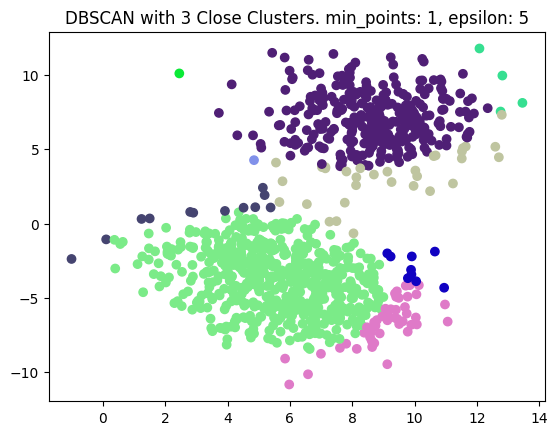

In [ ]:
x_blob, y_blob = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std=1.75)

db_scan = CustomDBscan(1, 5)
db_scan.fit(x_blob)
labels = db_scan.labels.astype(int)
num_clusters = len(np.unique(labels))
colors = np.random.random((num_clusters, 3))
label_colors = colors[labels]

plt.scatter(*x_blob.T, c=label_colors)
plt.title(f"DBSCAN with 3 Close Clusters. min_points: 1, epsilon: 5")

Text(0.5, 1.0, 'DBSCAN with 3 Close Clusters. min_points: 100, epsilon: 5')

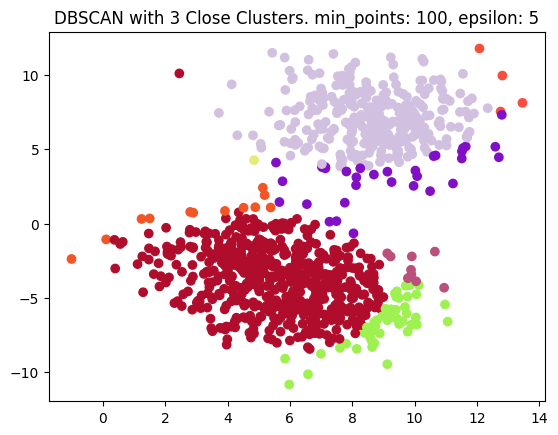

In [ ]:
db_scan = CustomDBscan(100, 5)
db_scan.fit(x_blob)
labels = db_scan.labels.astype(int)
num_clusters = len(np.unique(labels))
colors = np.random.random((num_clusters, 3))
label_colors = colors[labels]

plt.scatter(*x_blob.T, c=label_colors)
plt.title(f"DBSCAN with 3 Close Clusters. min_points: 100, epsilon: 5")

Text(0.5, 1.0, 'DBSCAN with 3 Close Clusters. min_points: 500, epsilon: 5')

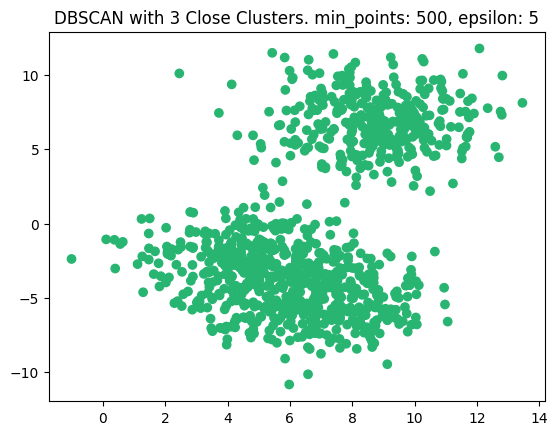

In [ ]:
db_scan = CustomDBscan(500, 5)
db_scan.fit(x_blob)
labels = db_scan.labels.astype(int)
num_clusters = len(np.unique(labels))
colors = np.random.random((num_clusters, 3))
label_colors = colors[labels]

plt.scatter(*x_blob.T, c=label_colors)
plt.title(f"DBSCAN with 3 Close Clusters. min_points: 500, epsilon: 5")

> While changing the min_points for a cluster, not much of the data has changed until the value of min_points was increased to a very large number. This is because min_points is very dependent to the number of data points inputted. In these examples, the size of the dataset was 1,000 points (we keep it lower for effeciency and will use 100,000 later). Once we increased min_points to 500 (half of the dataset size) it forced DBSCAN to detect the data as a single cluster. If the dataset used a size of 100,000, then this 500 min_points value would be redundant.

## DBSCAN on 100,000 Points
> We will now run and time DBSCAN on a dataset of 100,000 points.

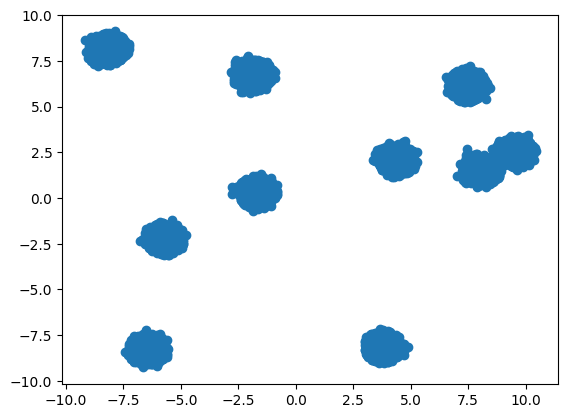

In [ ]:
x_blob, y_blob = make_blobs(n_samples=100_000, n_features=2, centers=10, cluster_std=0.25)
plt.scatter(*x_blob.T)

6min 9s ± 7.46 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


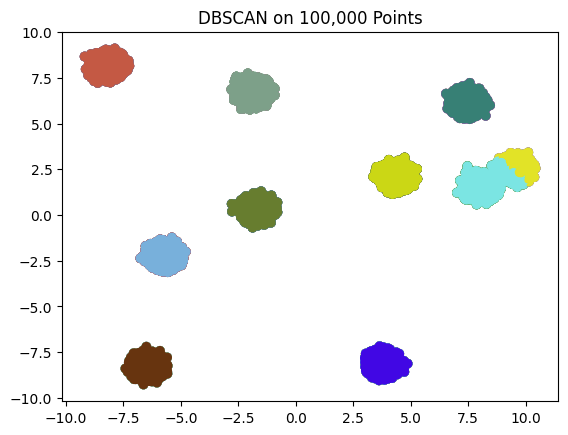

In [ ]:
%%timeit
db_scan = CustomDBscan(50, 2)
db_scan.fit(x_blob)
labels = db_scan.labels.astype(int)
num_clusters = len(np.unique(labels))
colors = np.random.random((num_clusters, 3))
label_colors = colors[labels]

plt.scatter(*x_blob.T, c=label_colors)
plt.title(f"DBSCAN on 100,000 Points")

## DBSCAN On MNIST
> We will now run DBSCAN on the MNIST Dataset. Unlike KMeans, where we were able to run it on the entire dataset very efficiently, we will only use a subset of 1000 images from the dataset due to the slow nature of DBSCAN. What we will do is run DBSCAN on the image vectors and plot 10 images from every cluster that DBSCAN finds.

In [ ]:
x_train = x_train / 255.

In [ ]:
db_scan = CustomDBscan(20, 11)
db_scan.fit(x_train.reshape(-1, 28*28)[:1000])

In [ ]:
labels = db_scan.labels.astype(int)
num_clusters = len(np.unique(labels))
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

871


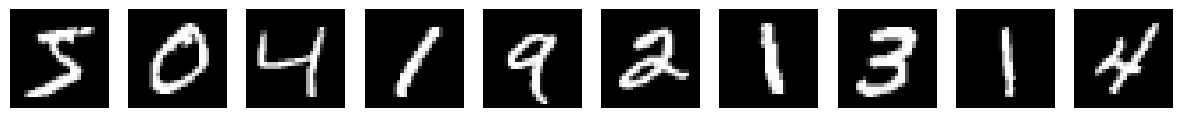

71


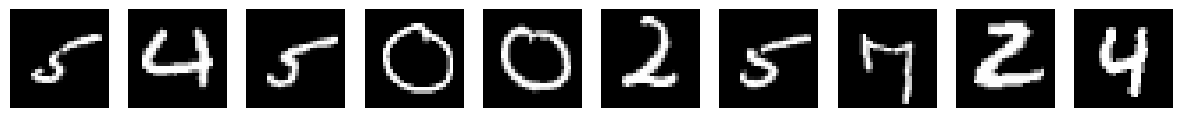

17


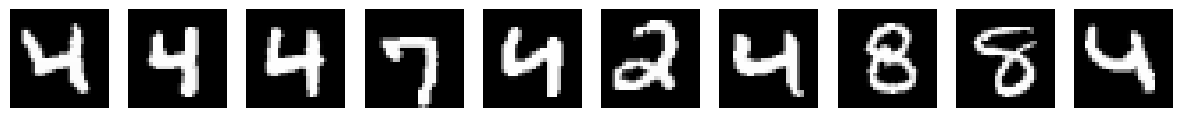

6


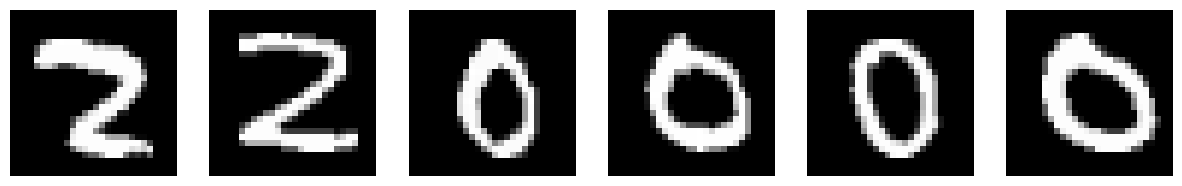

21


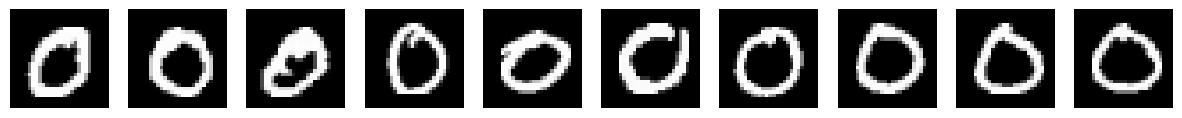

2


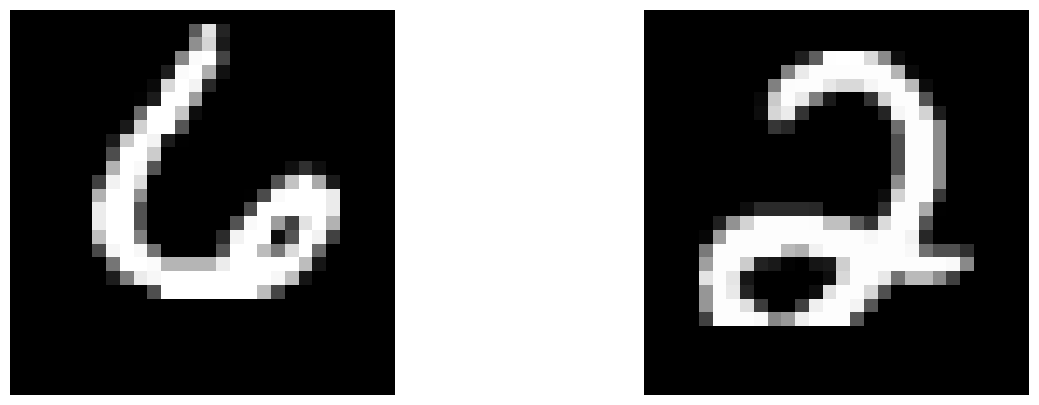

2


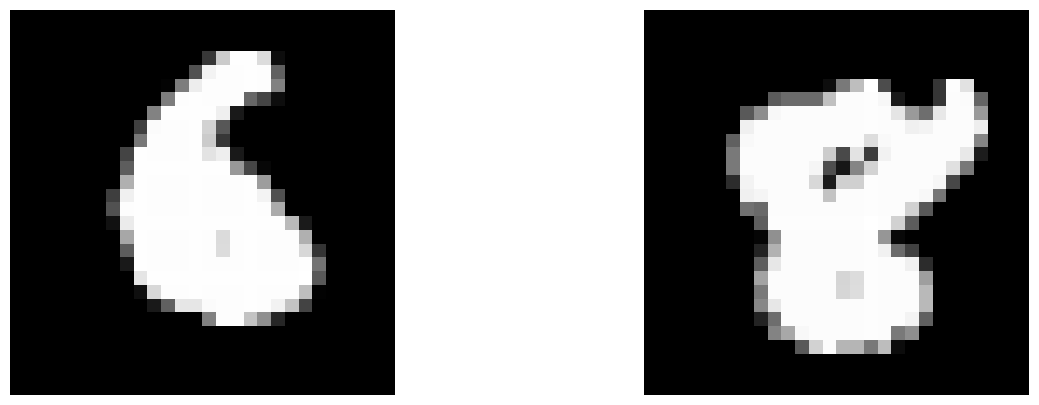

3


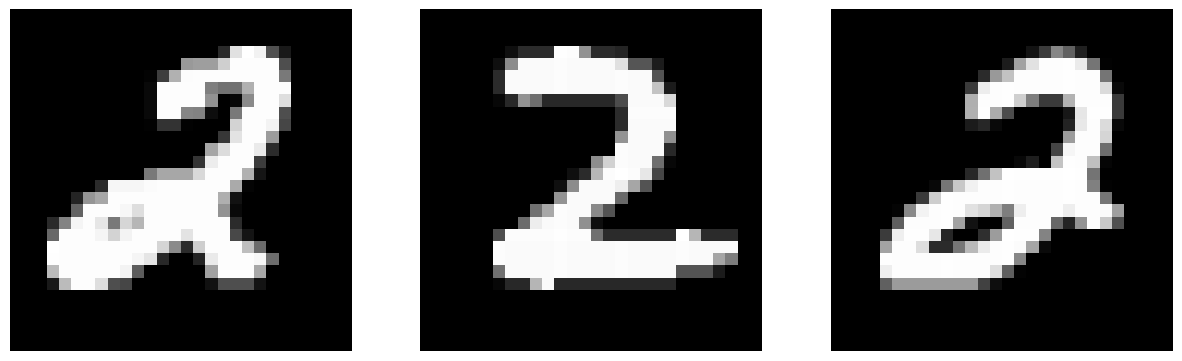

2


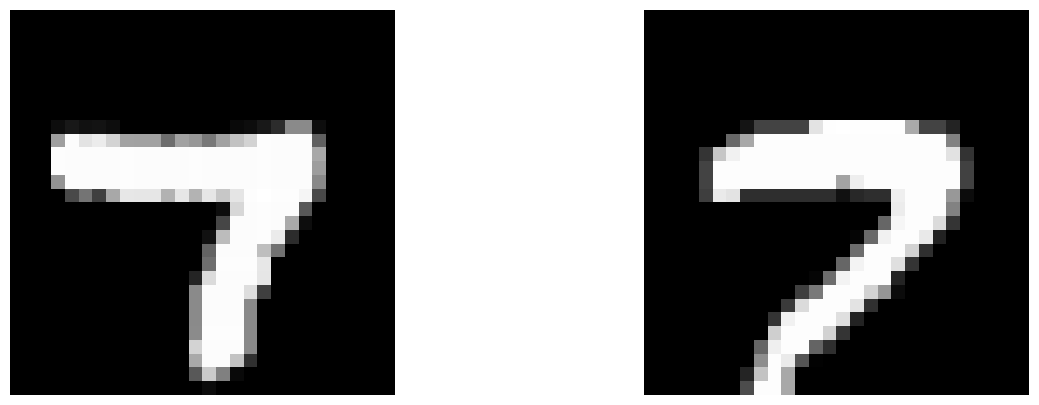

4


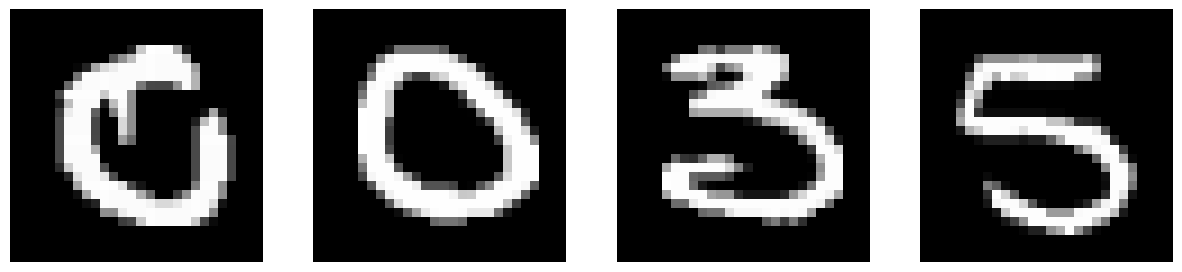

1


In [ ]:
for label in np.unique(labels):
    cluster = x_train[np.where(labels == label)[0]]
    print(len(cluster))
    if (len(cluster) <= 1):
      continue
    plot_images_in_a_row(cluster[:10])

> Notice how compared to KMeans, DBSCAN really struggled to find clusters in the MNIST dataset. Most likely this is due to the length of the vectors being in $\mathbb{R}^{784}$. With this high of a dimension, a lot of vectors were most likely far apart already, making DBSCAN strugle to find distinct groupings of vectors.